In [153]:
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

tf.__version__

'2.5.0'

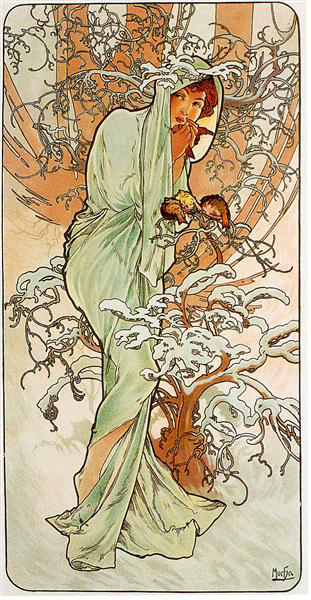

In [154]:
path = './alfons_mucha_winter_1896.jpg'
original_img = tf.keras.preprocessing.image.load_img(path)
original_img

In [155]:
img_height, img_width, channels = tf.keras.preprocessing.image.img_to_array(original_img).shape
print(img_height, img_width, channels)

600 311 3


In [156]:
tf.expand_dims(original_img, 0)[0].shape

TensorShape([600, 311, 3])

In [157]:
def display_augmentation(image, data_augmentation):
    
    # change 3D-Tensor to 4D of shape=(1, 600, 311, 3)
    image = tf.expand_dims(image, 0)

    plt.figure(figsize=(15, 15))

    for i in range(9):
        
        # augment image
        augmented_image = data_augmentation(image)
        
#         augmented_image = np.asarray(augmented_image[0])
        
#         augmented_image = np.squeeze(augmented_image)

        ax = plt.subplot(3, 3, i + 1)

#         plt.imshow(augmented_image)
    
        plt.imshow(augmented_image[0])

        plt.axis("off")


# 1. Random Flip

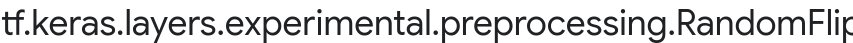

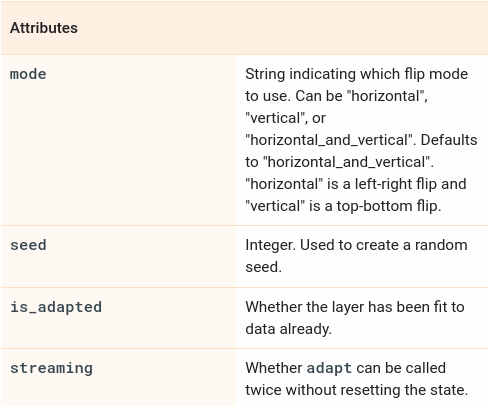

## Horizontal + Vertical

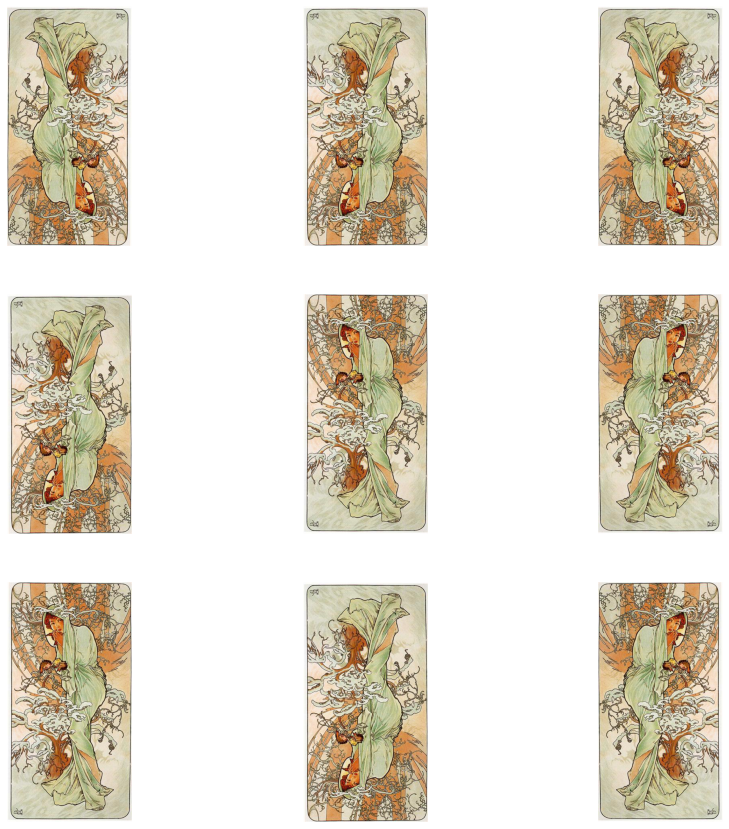

In [158]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip

image = original_img

data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
])

display_augmentation(image, data_augmentation)

## Vertical

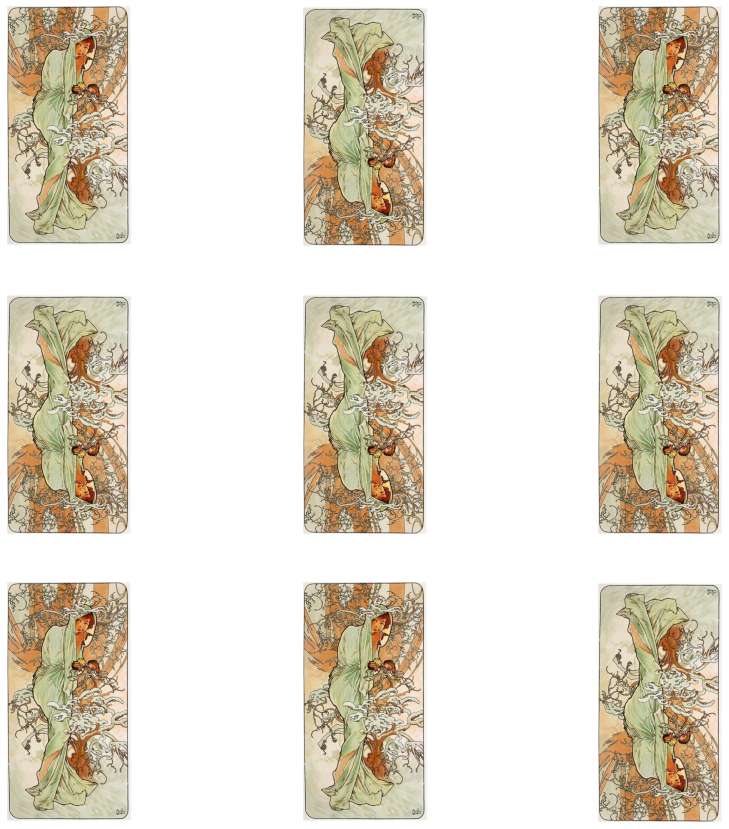

In [169]:
image = original_img

data_augmentation = tf.keras.Sequential([
  RandomFlip("vertical"),
])

display_augmentation(image, data_augmentation)

## Horizontal

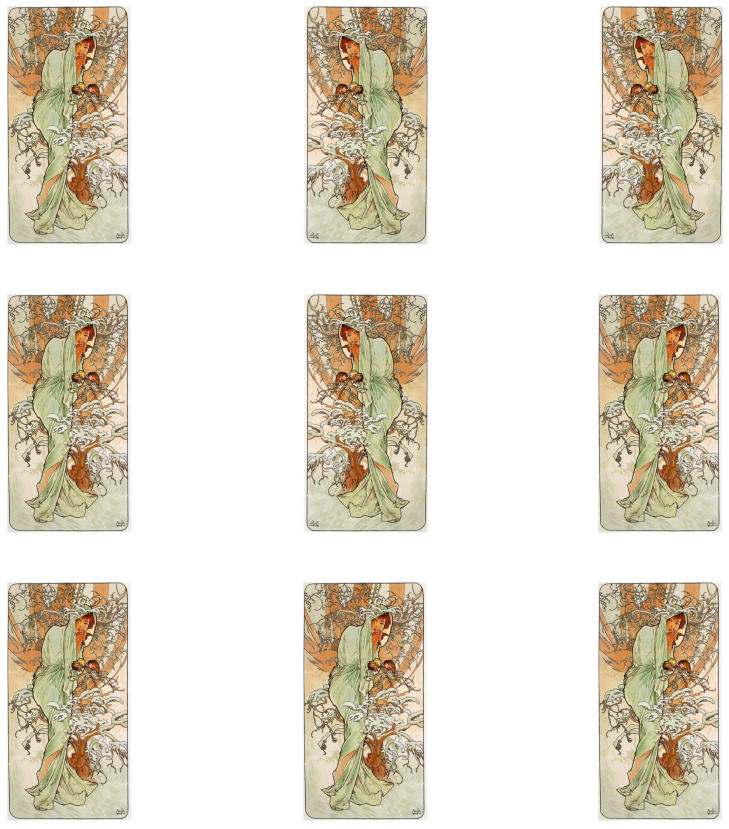

In [170]:
image = original_img

data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal"),
])

display_augmentation(image, data_augmentation)

# 2. Random Rotation

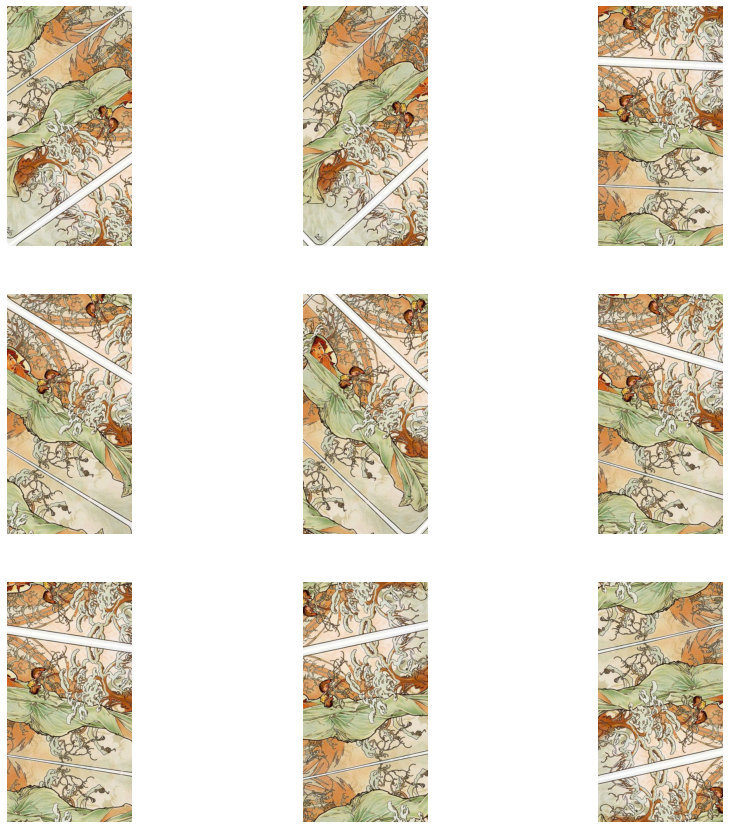

In [159]:
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation

image = original_img

data_augmentation = tf.keras.Sequential([
  RandomRotation(0.3),
])

display_augmentation(image, data_augmentation)

# 3. Random Crop

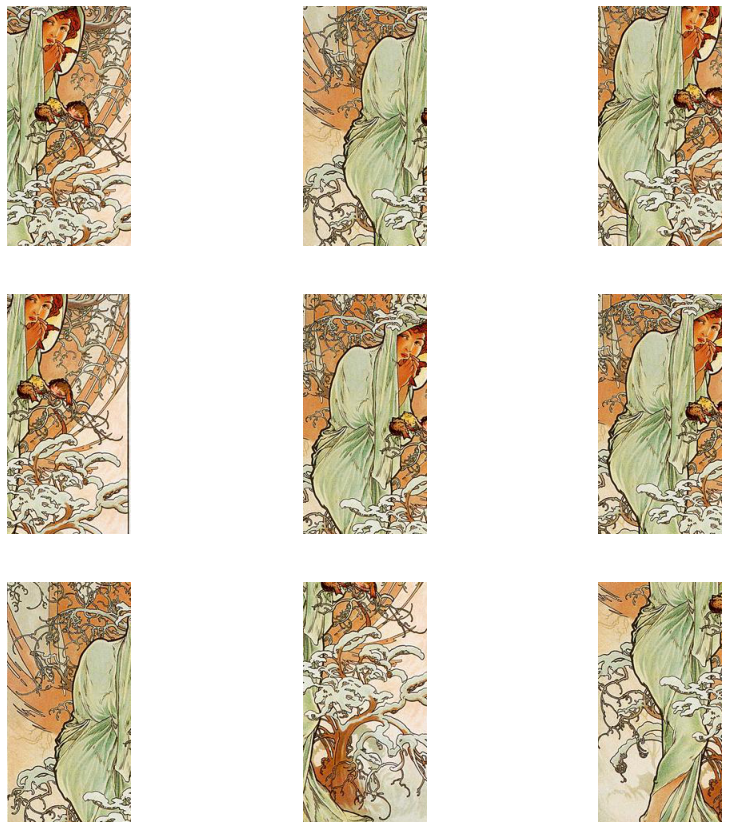

In [160]:
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop

image = original_img

data_augmentation = tf.keras.Sequential([
  RandomCrop(int(img_height/2), int(img_width/2)),
])

display_augmentation(image, data_augmentation)

# 4. Random Contrast

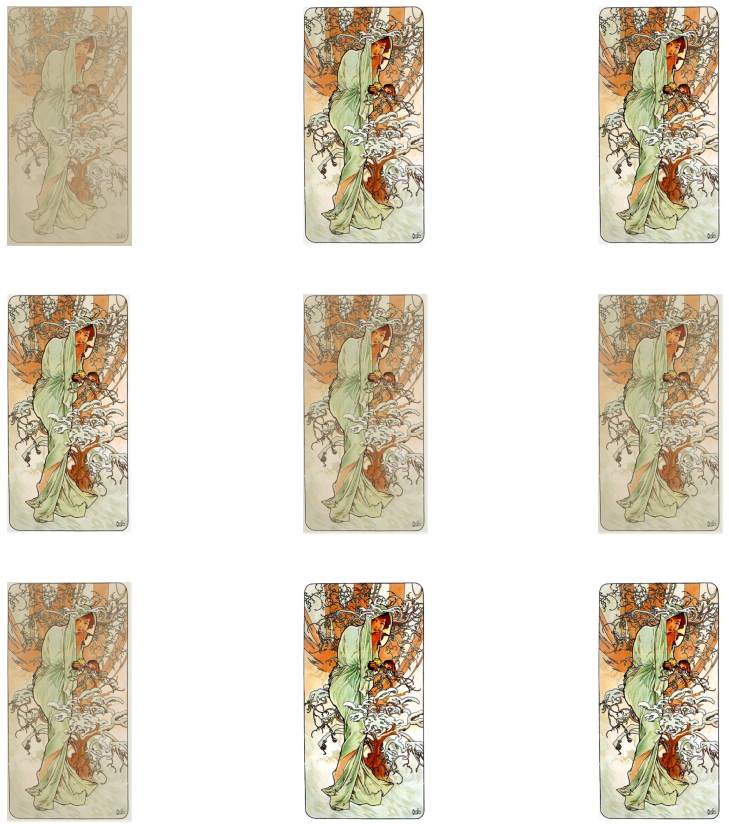

In [161]:
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast

image = original_img

data_augmentation = tf.keras.Sequential([
  RandomContrast(0.7),
])

display_augmentation(image, data_augmentation)

# 5. Random Height

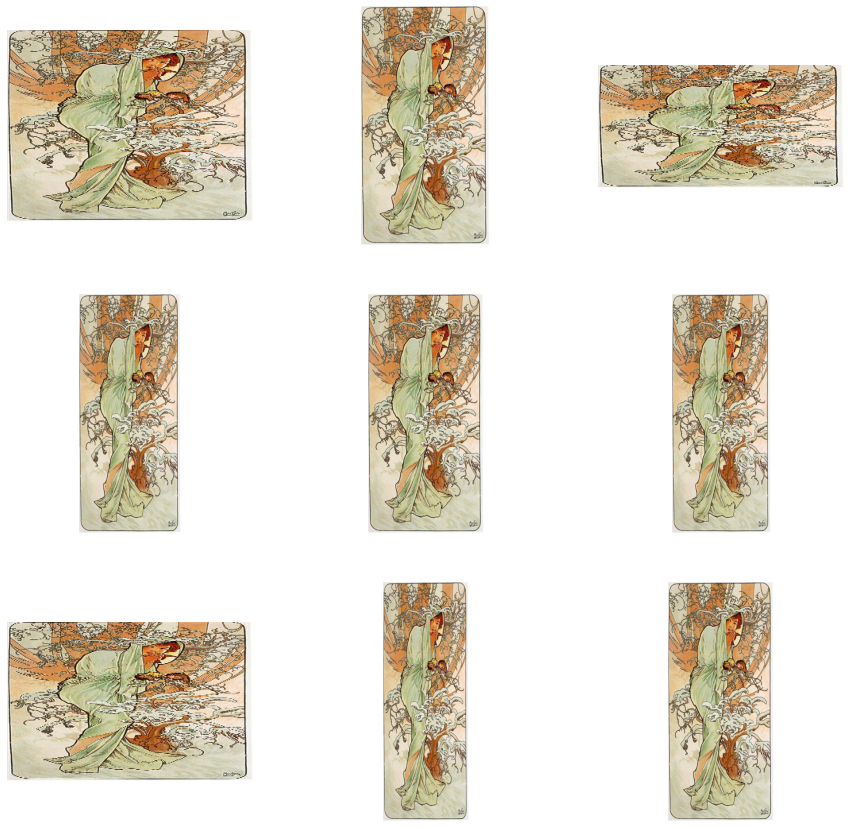

In [162]:
from tensorflow.keras.layers.experimental.preprocessing import RandomHeight, Rescaling

image = original_img

data_augmentation = tf.keras.Sequential([
    Rescaling(1./255),
    RandomHeight(factor=(-0.8, 0.8))
])

display_augmentation(image, data_augmentation)

# 6. Random  Translation

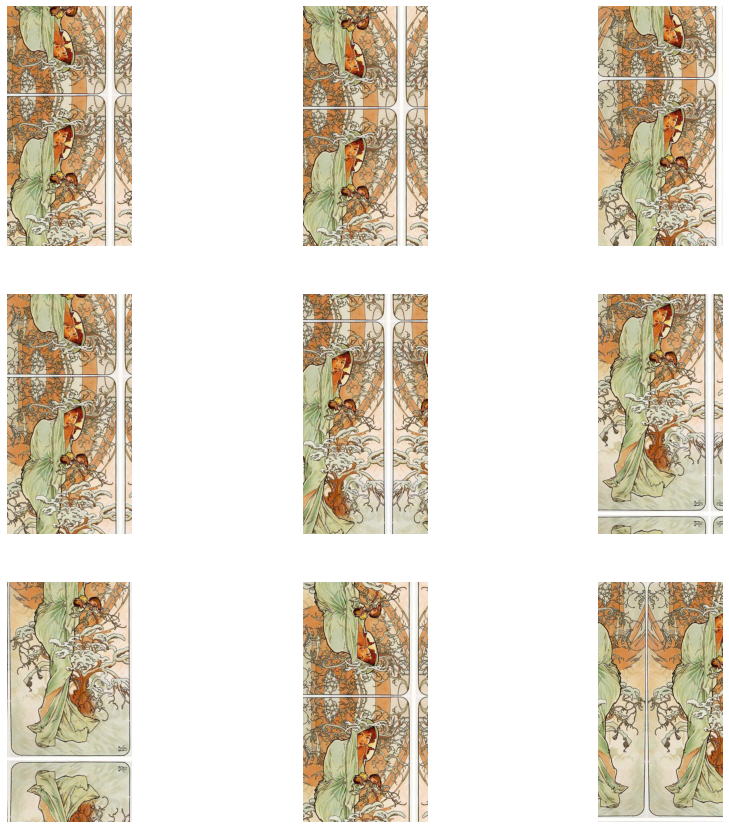

In [163]:
from tensorflow.keras.layers.experimental.preprocessing import RandomTranslation

image = original_img

height_factor = (-0.5, 0.5)
width_factor = (-0.5, 0.5)

data_augmentation = tf.keras.Sequential([
  RandomTranslation(height_factor=height_factor,
                    width_factor=width_factor),
])

display_augmentation(image, data_augmentation)

# 7. Random Width

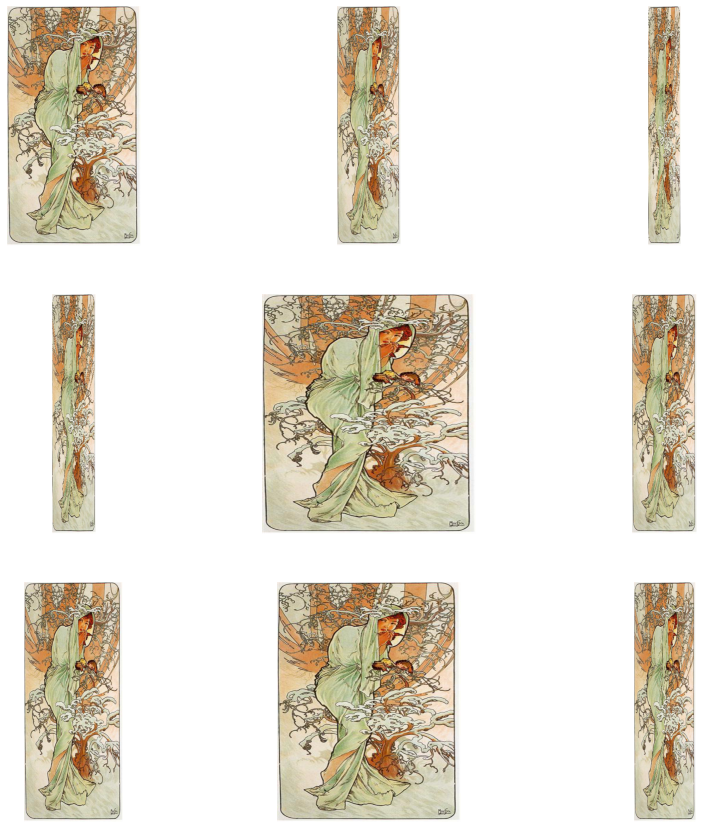

In [166]:
from tensorflow.keras.layers.experimental.preprocessing import RandomWidth

image = original_img

data_augmentation = tf.keras.Sequential([
    Rescaling(1./255),
    RandomWidth((-0.8, 0.8))
])

display_augmentation(image, data_augmentation)

# 8. Random Zoom

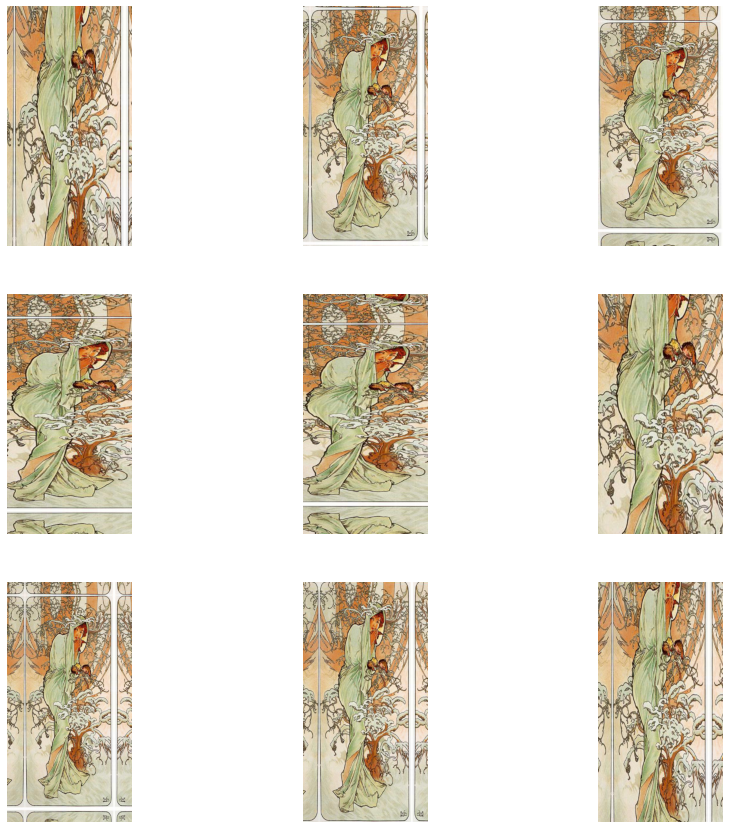

In [168]:
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom

image = original_img

height_factor = (-0.5, 0.5)
width_factor = (-0.5, 0.5)

data_augmentation = tf.keras.Sequential([
  RandomZoom(height_factor=height_factor,
             width_factor=width_factor)
])

display_augmentation(image, data_augmentation)